<a href="https://colab.research.google.com/github/ArthBachhuka123/MachineLearning/blob/main/pipe%26transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pickle

In [46]:
df = pd.read_csv("/content/drive/MyDrive/files/concrete_data.csv")

In [47]:
df.sample(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
92,337.9,189.0,0.0,174.9,9.5,944.7,755.8,3,24.10
927,157.0,214.0,152.0,200.0,9.0,819.0,704.0,28,33.05
119,425.0,106.3,0.0,151.4,18.6,936.0,803.7,28,61.80
948,153.1,145.0,113.0,178.5,8.0,867.2,824.0,28,26.23
441,250.0,0.0,95.7,191.8,5.3,948.9,857.2,28,27.22


In [48]:
df.isnull().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Strength,0


In [49]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=["Strength"]),df["Strength"], test_size=0.2)

In [52]:
X_train

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
622,307.0,0.0,0.0,193.0,0.0,968.0,812.0,365
765,385.0,0.0,0.0,186.0,0.0,966.0,763.0,7
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
37,332.5,142.5,0.0,228.0,0.0,932.0,594.0,90
910,144.0,136.0,106.0,178.0,7.0,941.0,774.0,28
...,...,...,...,...,...,...,...,...
476,446.0,24.0,79.0,162.0,11.6,967.0,712.0,3
58,304.0,76.0,0.0,228.0,0.0,932.0,670.0,180
748,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,7
686,305.3,203.5,0.0,203.5,0.0,965.4,631.0,3


In [53]:
trf1 = ColumnTransformer([
    ("scaler",StandardScaler(),[0,1,2,3,4,5,6,7]),
],remainder="passthrough"
)

In [54]:
trf2 = ColumnTransformer([
    ("power",PowerTransformer(method="yeo-johnson"),[0,1,2,3,4,5,6,7])
],remainder="passthrough"
)


In [55]:
trf3 = LinearRegression()


In [56]:
pipe = Pipeline([
    ("trf1",trf1),
    ("trf2",trf2),
    ("trf3",trf3)
])

In [57]:
from sklearn import set_config
set_config(display="diagram")

In [58]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  [0, 1, 2, 3, 4, 5, 6, 7])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('power', PowerTransformer(),
                                                  [0, 1, 2, 3, 4, 5, 6, 7])])),
                ('trf3', LinearRegression())])

In [59]:
preprocessor = Pipeline([
    ("power", PowerTransformer(method="yeo-johnson"))
])
X_train_transformed = preprocessor.fit_transform(X_train)



In [60]:
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=X_train.columns)

In [61]:
pipe.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('scaler', StandardScaler(),
                                  [0, 1, 2, 3, 4, 5, 6, 7])]),
 'trf2': ColumnTransformer(remainder='passthrough',
                   transformers=[('power', PowerTransformer(),
                                  [0, 1, 2, 3, 4, 5, 6, 7])]),
 'trf3': LinearRegression()}

In [62]:
pipe.score(X_test,y_test)

0.7967911071891671

In [63]:
y_pred  = pipe.predict(X_test)

In [64]:
r2_score(y_test,y_pred)

0.7967911071891671

In [65]:
np.sqrt(mean_squared_error(y_test,y_pred))

np.float64(7.388420628805047)

/tmp/ipython-input-3032161815.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed_df[col])


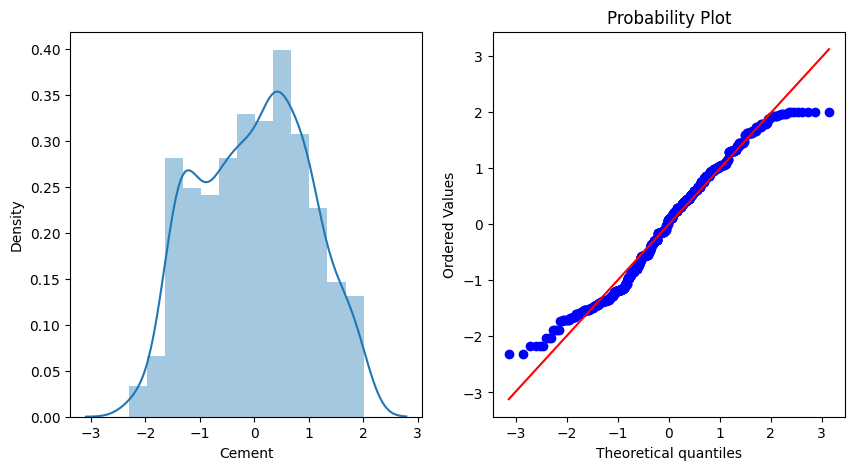

/tmp/ipython-input-3032161815.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed_df[col])


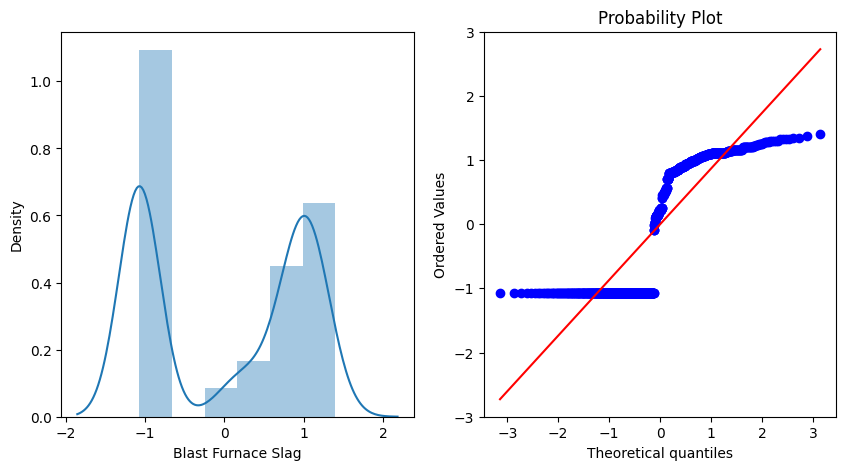

/tmp/ipython-input-3032161815.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed_df[col])


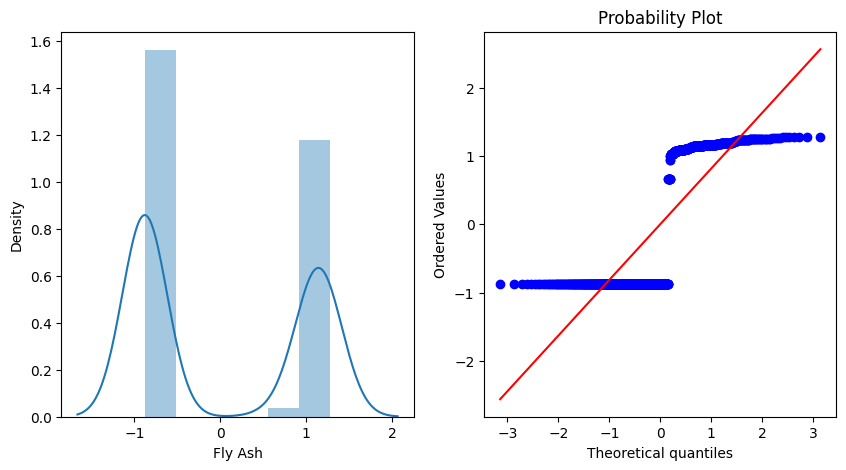

/tmp/ipython-input-3032161815.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed_df[col])


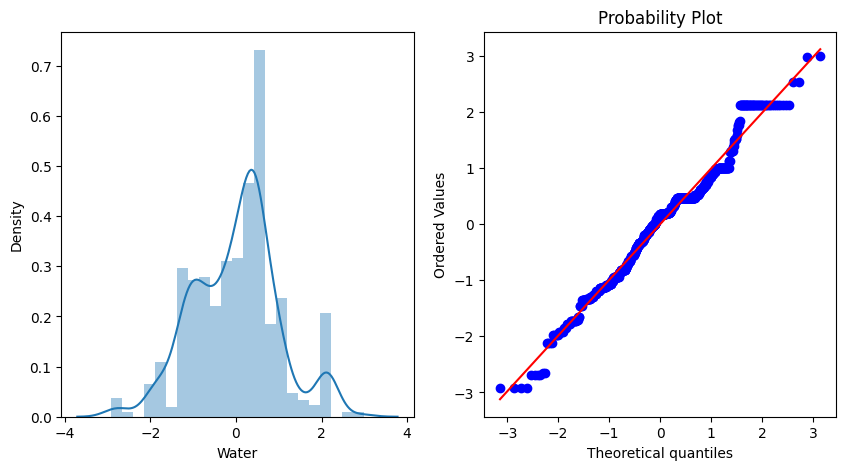

/tmp/ipython-input-3032161815.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed_df[col])


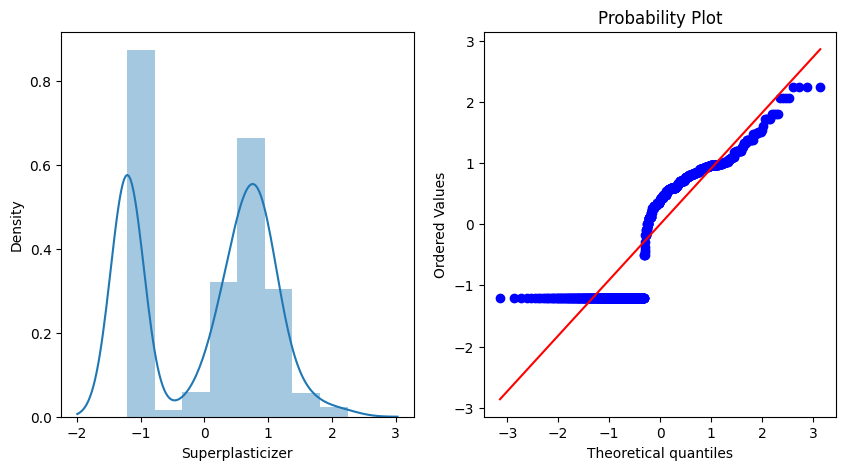

/tmp/ipython-input-3032161815.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed_df[col])


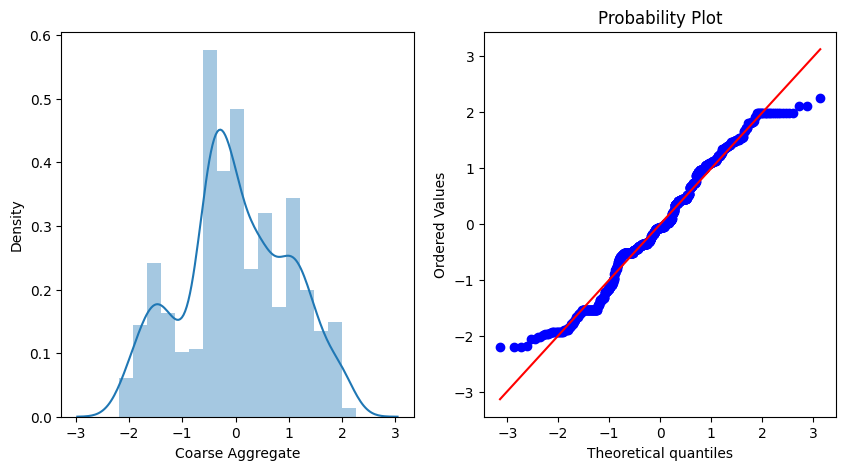

/tmp/ipython-input-3032161815.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed_df[col])


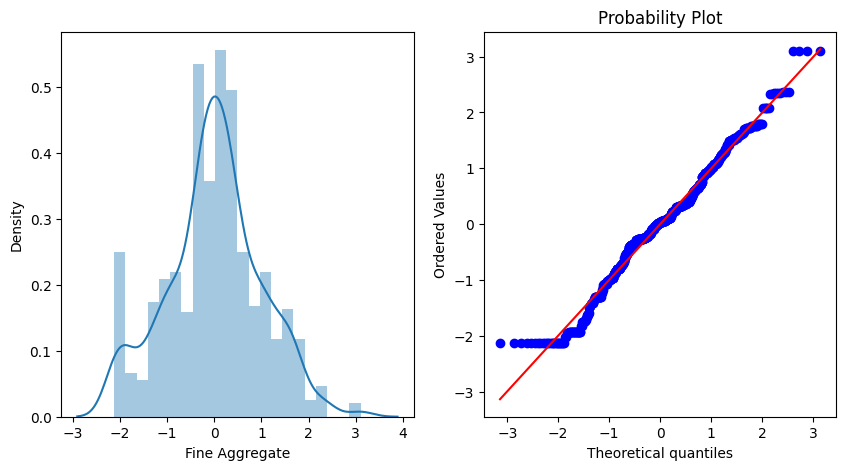

/tmp/ipython-input-3032161815.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed_df[col])


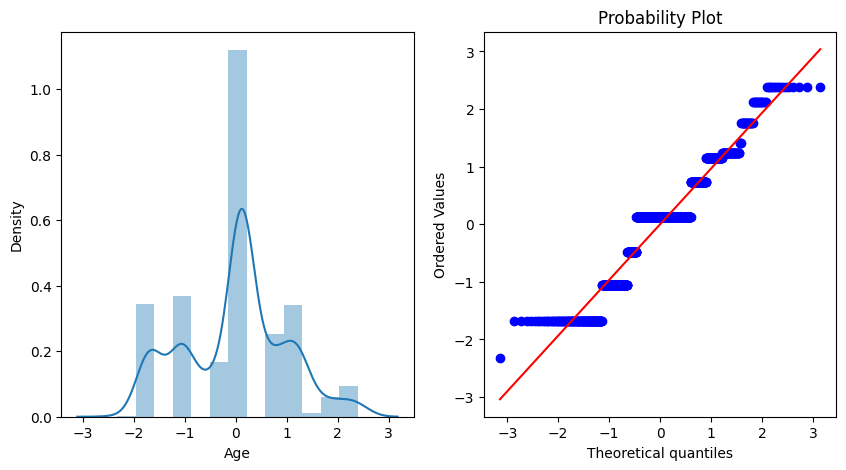

In [66]:
for col in X_train_transformed_df:
  plt.figure(figsize=(10,5))
  plt.subplot(121)
  sns.distplot(X_train_transformed_df[col])
  plt.subplot(122)
  stats.probplot(X_train_transformed_df[col],dist="norm",plot=plt)
  plt.show()



In [67]:
from sklearn.model_selection import cross_val_score
import numpy as np

# 5-fold cross-validation, using R² score
scores =cross_val_score(pipe, X_train, y_train, cv=5, scoring="r2")

print("R² scores for each fold:", scores)
print("Mean R²:", np.mean(scores))
print("Std R²:", np.std(scores))

R² scores for each fold: [0.81991393 0.83268293 0.771253   0.81289878 0.8337018 ]
Mean R²: 0.8140900910202026
Std R²: 0.022806426406442433


/tmp/ipython-input-351112804.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed_df[col])
/tmp/ipython-input-351112804.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


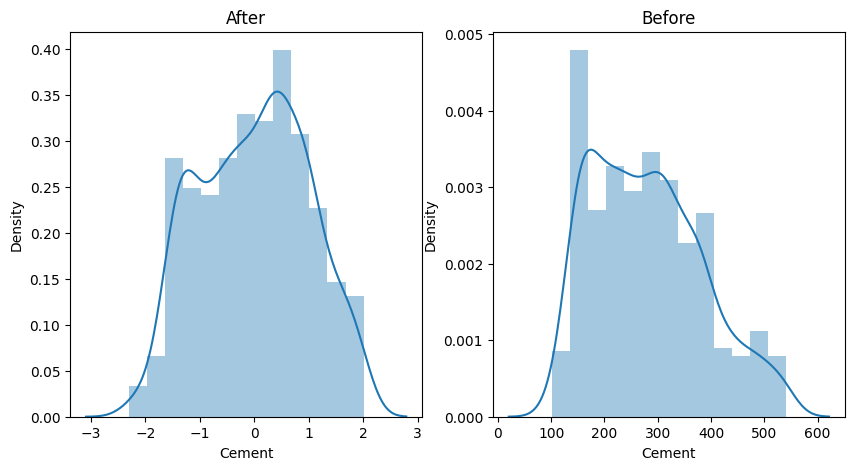

/tmp/ipython-input-351112804.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed_df[col])
/tmp/ipython-input-351112804.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


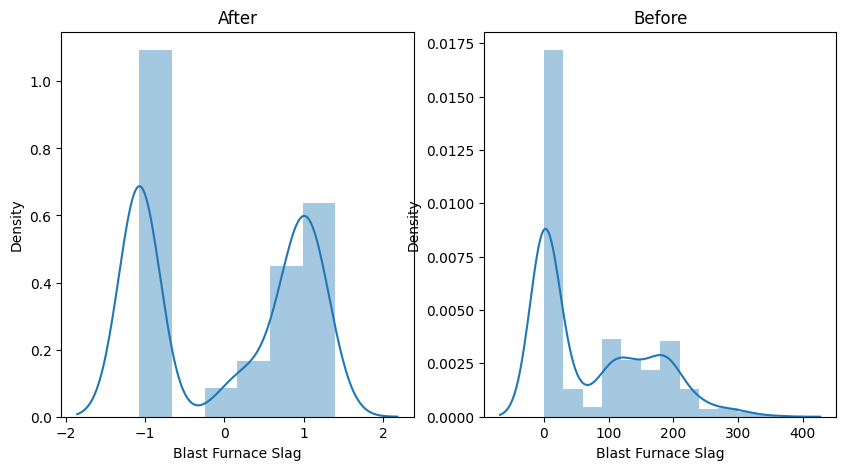

/tmp/ipython-input-351112804.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed_df[col])
/tmp/ipython-input-351112804.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


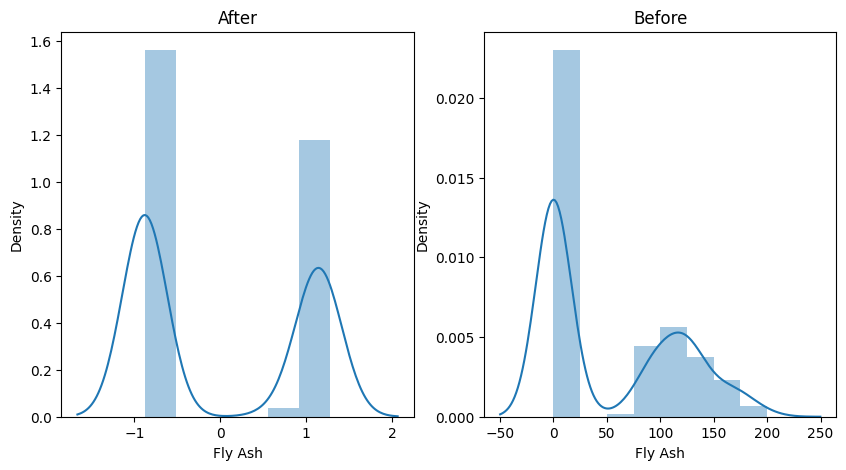

/tmp/ipython-input-351112804.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed_df[col])
/tmp/ipython-input-351112804.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


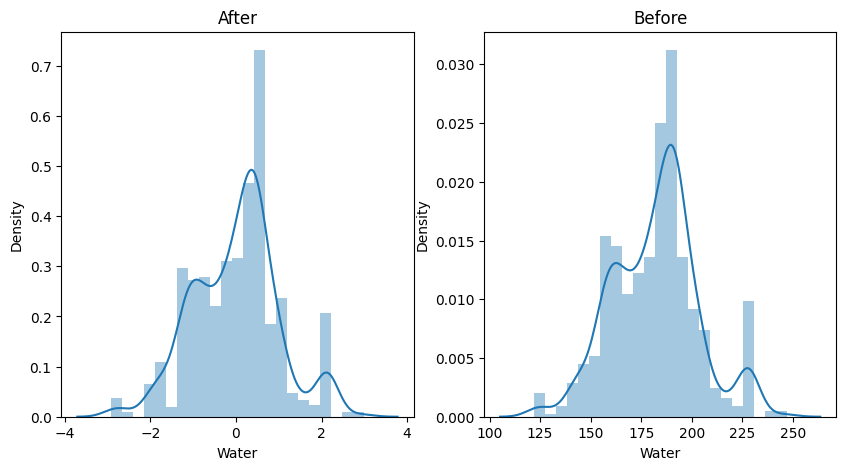

/tmp/ipython-input-351112804.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed_df[col])
/tmp/ipython-input-351112804.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


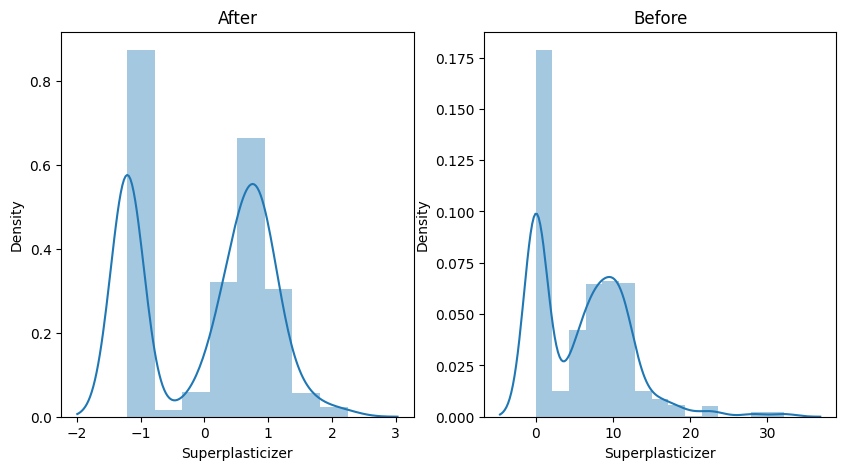

/tmp/ipython-input-351112804.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed_df[col])
/tmp/ipython-input-351112804.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


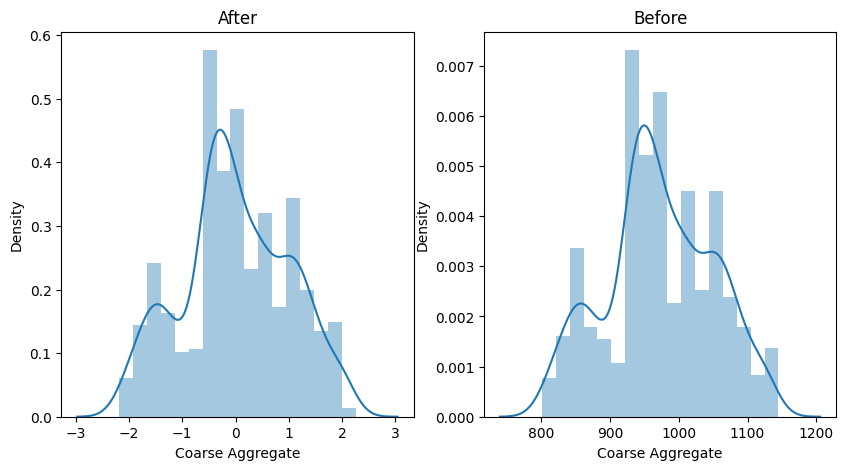

/tmp/ipython-input-351112804.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed_df[col])
/tmp/ipython-input-351112804.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


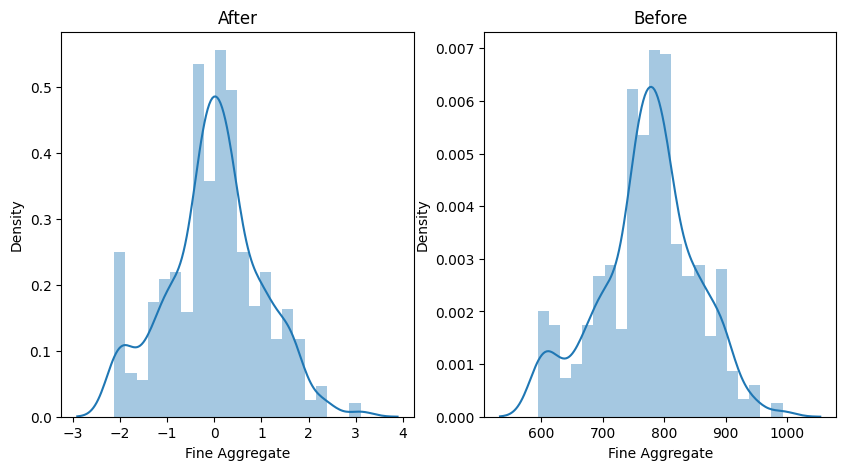

/tmp/ipython-input-351112804.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed_df[col])
/tmp/ipython-input-351112804.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


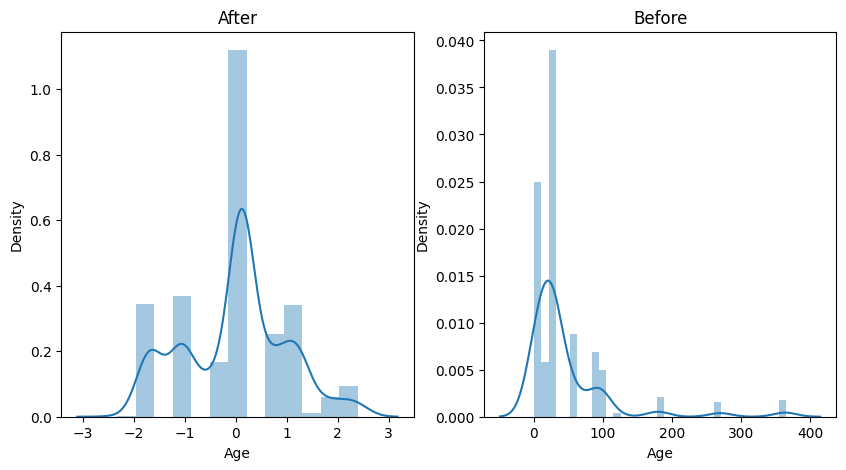

In [70]:
for col in X_train_transformed_df:
  plt.figure(figsize=(10,5))
  plt.subplot(121)
  sns.distplot(X_train_transformed_df[col])
  plt.title("After")
  plt.subplot(122)
  sns.distplot(X_train[col])
  plt.title("Before")
  plt.show()
